### Libraries

In [19]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Load the data

In [2]:
df = pd.read_csv("cleaned_data/df_processed.csv")
df_copy = df.copy()
df.head()

,individual_id,age,dod,sex,obs_date,source,hdss_name,alco_ever,alco_12m,alco_30d,...,alcohol_use,tobacco_use,stroke_status_derived_age,hpt_status_derived_age,diab_status_derived_age,hiv_status_derived_age,stroke_status_derived_incident,hpt_status_derived_incident,diab_status_derived_incident,hiv_status_derived_incident
0,000025C5-5811-4942-8957-8A1A4FF1460F,35,NaN,2,2008-07-26,Assess Linkages Main,Nairobi,0.0,NaN,NaN,...,888,0.0,35.0,35.0,35.0,35.0,0,0,0,0
1,000025C5-5811-4942-8957-8A1A4FF1460F,39,NaN,2,2012-09-30,SCALEUP Population Baseline,Nairobi,NaN,0.0,NaN,...,0,0.0,39.0,39.0,39.0,39.0,0,1,0,0
2,0004A623-93CA-4D53-B10C-805B27EFD98F,36,NaN,1,2012-08-26,SCALEUP Population Baseline,Nairobi,NaN,0.0,NaN,...,0,0.0,36.0,36.0,36.0,36.0,0,1,0,0
3,000D523D-F549-40B3-B8E1-2FF517084EB0,56,NaN,1,2008-04-30,Assess Linkages Main,Nairobi,0.0,NaN,NaN,...,888,0.0,56.0,56.0,56.0,56.0,0,1,0,0
4,000D523D-F549-40B3-B8E1-2FF517084EB0,61,NaN,1,2012-08-24,SCALEUP Population Baseline,Nairobi,NaN,0.0,NaN,...,0,0.0,61.0,56.0,61.0,61.0,0,0,0,0


### Descriptives

#### Total individuals vs. stroke cases

In [3]:
total_records = df.shape
total = df.individual_id.nunique()
stroke_cases = df.loc[df.stroke_status_derived == 1, 'individual_id'].nunique()
               
print(f"The number of total records are  ,    {total_records}")
print(f"Number of unique individuals     ,    {total}")
print(f"Number of individuals with stroke,    {stroke_cases}")

The number of total records are  ,    (46769, 111)
Number of unique individuals     ,    25486
Number of individuals with stroke,    1094


### Subset the data
#### Subsetting the necessary columns

In [4]:
smaller_df = df[[
    'individual_id','age', 'bmi'
    , 'hiv_status_derived', 'hiv_status_derived_age', 'hpt_status_derived', 'hpt_status_derived_age', 'diab_status_derived', 'diab_status_derived_age',
    'obese_status_derived', 'tb_status_derived'
    ,'stroke_status_derived', 'stroke_status_derived_age'
]]
smaller_df.head()

,individual_id,age,bmi,hiv_status_derived,hiv_status_derived_age,hpt_status_derived,hpt_status_derived_age,diab_status_derived,diab_status_derived_age,obese_status_derived,tb_status_derived,stroke_status_derived,stroke_status_derived_age
0,000025C5-5811-4942-8957-8A1A4FF1460F,35,NaN,0,35.0,0,35.0,0,35.0,0.0,NaN,0,35.0
1,000025C5-5811-4942-8957-8A1A4FF1460F,39,25.9187,0,39.0,1,39.0,0,39.0,0.0,NaN,0,39.0
2,0004A623-93CA-4D53-B10C-805B27EFD98F,36,31.1690,0,36.0,1,36.0,0,36.0,1.0,NaN,0,36.0
3,000D523D-F549-40B3-B8E1-2FF517084EB0,56,NaN,0,56.0,1,56.0,0,56.0,0.0,NaN,0,56.0
4,000D523D-F549-40B3-B8E1-2FF517084EB0,61,32.6677,0,61.0,1,56.0,0,61.0,1.0,NaN,0,61.0


### Checking for missingness

In [17]:
# Count missing values per column
df.isnull().sum()

# Percentage of missing values
df.isnull().mean() * 100

individual_id                      0.000000
age                                0.000000
dod                               86.129701
sex                                0.000000
obs_date                           0.000000
                                    ...    
hiv_status_derived_age             0.000000
stroke_status_derived_incident     0.000000
hpt_status_derived_incident        0.000000
diab_status_derived_incident       0.000000
hiv_status_derived_incident        0.000000
Length: 111, dtype: float64

### Summary table for missingness

In [6]:
missing_summary = pd.DataFrame({
    'Missing Values': df.isnull().sum(),
    'Missing %': df.isnull().mean() * 100
}).sort_values(by='Missing %', ascending=False)

print(missing_summary)

                                Missing Values  Missing %
tobac_p_daily                            46769      100.0
stroke_paralysis_ever                    46769      100.0
stroke_trans_isc_ever                    46769      100.0
hiv_rx_trad_ever                         46769      100.0
hiv_tested_when_d                        46769      100.0
...                                        ...        ...
hiv_status_derived_age                       0        0.0
stroke_status_derived_incident               0        0.0
hpt_status_derived_incident                  0        0.0
diab_status_derived_incident                 0        0.0
hiv_status_derived_incident                  0        0.0

[111 rows x 2 columns]


### Visualize missingness

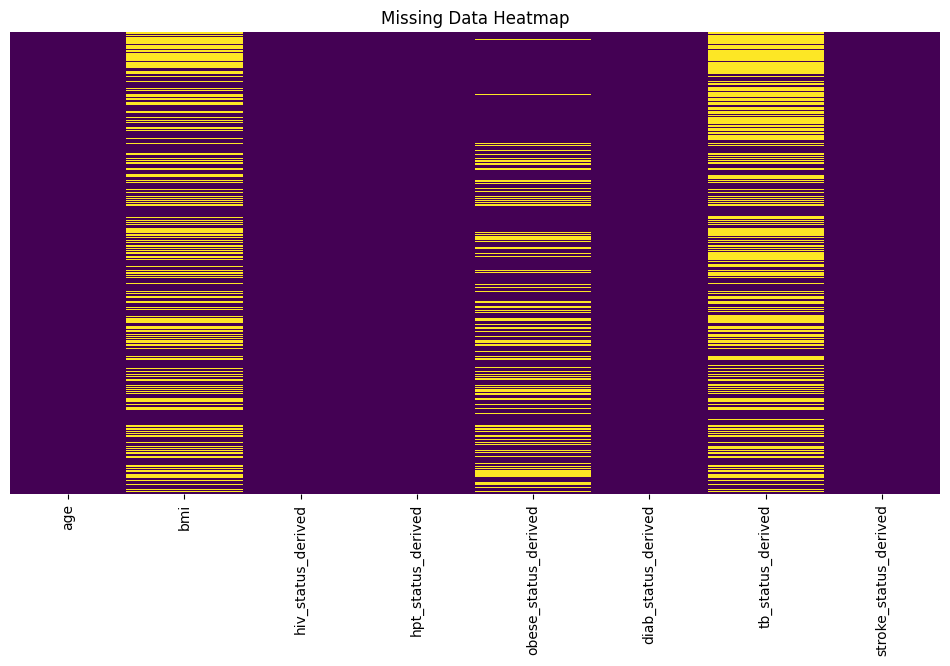

In [7]:
# Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df[[
    'age', 'bmi', 'hiv_status_derived', 'hpt_status_derived',
    'obese_status_derived', 'diab_status_derived', 'tb_status_derived','stroke_status_derived'
]].isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Missing Data Heatmap")
# Save to file (you can change format and dpi)
plt.savefig("stroke_output/missing_data_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

In [21]:
df.columns

Index(['individual_id', 'age', 'dod', 'sex', 'obs_date', 'source', 'hdss_name',
       'alco_ever', 'alco_12m', 'alco_30d',
       ...
       'alcohol_use', 'tobacco_use', 'stroke_status_derived_age',
       'hpt_status_derived_age', 'diab_status_derived_age',
       'hiv_status_derived_age', 'stroke_status_derived_incident',
       'hpt_status_derived_incident', 'diab_status_derived_incident',
       'hiv_status_derived_incident'],
      dtype='object', length=111)

In [24]:
df[['alcohol_use','tobacco_use']].isnull().sum() #.isnull().mean() * 100

alcohol_use      0
tobacco_use    234
dtype: int64

In [27]:
print(df['alcohol_use'].value_counts())
print(df['tobacco_use'].value_counts())

alcohol_use
888    32313
0       8336
1       5477
999      640
333        2
444        1
Name: count, dtype: int64
tobacco_use
0.0      35259
1.0       9253
999.0     2022
444.0        1
Name: count, dtype: int64


## SMALLER DATAFRAME
It has fewer variables of interest

In [20]:
smaller_df.head()

,individual_id,age,bmi,hiv_status_derived,hiv_status_derived_age,hpt_status_derived,hpt_status_derived_age,diab_status_derived,diab_status_derived_age,obese_status_derived,tb_status_derived,stroke_status_derived,stroke_status_derived_age
0,000025C5-5811-4942-8957-8A1A4FF1460F,35,NaN,0,35.0,0,35.0,0,35.0,0.0,NaN,0,35.0
1,000025C5-5811-4942-8957-8A1A4FF1460F,39,25.9187,0,39.0,1,39.0,0,39.0,0.0,NaN,0,39.0
2,0004A623-93CA-4D53-B10C-805B27EFD98F,36,31.1690,0,36.0,1,36.0,0,36.0,1.0,NaN,0,36.0
3,000D523D-F549-40B3-B8E1-2FF517084EB0,56,NaN,0,56.0,1,56.0,0,56.0,0.0,NaN,0,56.0
4,000D523D-F549-40B3-B8E1-2FF517084EB0,61,32.6677,0,61.0,1,56.0,0,61.0,1.0,NaN,0,61.0


### Missingness summary report

In [8]:
missing_summary = pd.DataFrame({
    'Missing Values': smaller_df.isnull().sum(),
    'Missing %': smaller_df.isnull().mean() * 100
}).sort_values(by='Missing %', ascending=False)

print(missing_summary)

                           Missing Values  Missing %
tb_status_derived                   24072  51.469991
bmi                                 17310  37.011696
obese_status_derived                10700  22.878402
individual_id                           0   0.000000
age                                     0   0.000000
hiv_status_derived_age                  0   0.000000
hiv_status_derived                      0   0.000000
hpt_status_derived                      0   0.000000
hpt_status_derived_age                  0   0.000000
diab_status_derived_age                 0   0.000000
diab_status_derived                     0   0.000000
stroke_status_derived                   0   0.000000
stroke_status_derived_age               0   0.000000


### Missingness visualization

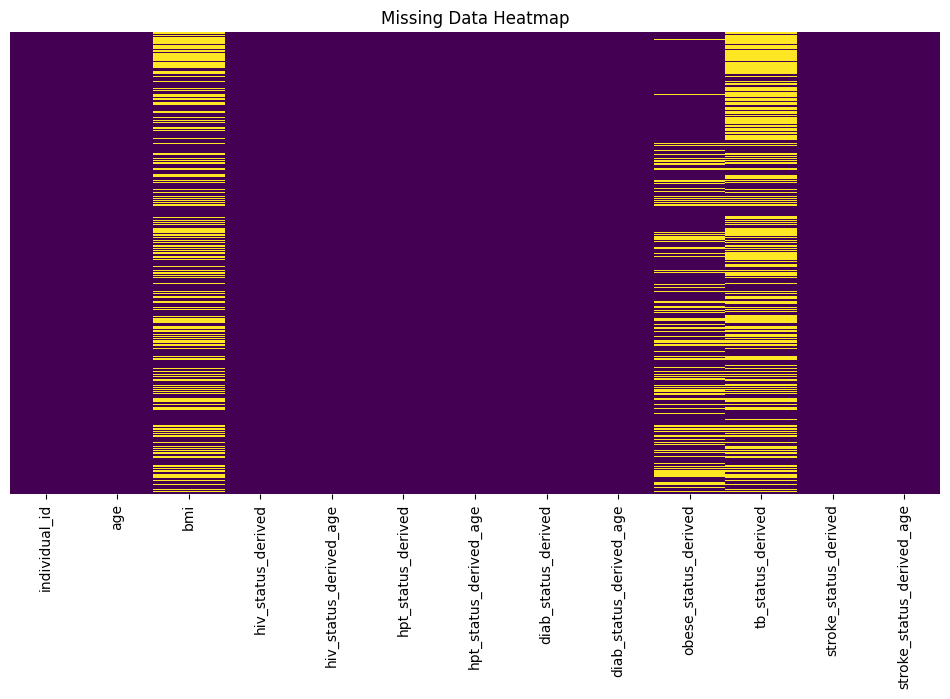

In [9]:
# Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(smaller_df[[
    'individual_id','age', 'bmi'
    , 'hiv_status_derived', 'hiv_status_derived_age', 'hpt_status_derived', 'hpt_status_derived_age', 'diab_status_derived', 'diab_status_derived_age',
    'obese_status_derived', 'tb_status_derived'
    ,'stroke_status_derived', 'stroke_status_derived_age'
]].isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Missing Data Heatmap")
# Save to file (you can change format and dpi)
plt.savefig("stroke_output/missing_data_heatmap_smaller.png", dpi=300, bbox_inches='tight')
plt.show()

### Sneak preview

In [10]:
smaller_df.head()

,individual_id,age,bmi,hiv_status_derived,hiv_status_derived_age,hpt_status_derived,hpt_status_derived_age,diab_status_derived,diab_status_derived_age,obese_status_derived,tb_status_derived,stroke_status_derived,stroke_status_derived_age
0,000025C5-5811-4942-8957-8A1A4FF1460F,35,NaN,0,35.0,0,35.0,0,35.0,0.0,NaN,0,35.0
1,000025C5-5811-4942-8957-8A1A4FF1460F,39,25.9187,0,39.0,1,39.0,0,39.0,0.0,NaN,0,39.0
2,0004A623-93CA-4D53-B10C-805B27EFD98F,36,31.1690,0,36.0,1,36.0,0,36.0,1.0,NaN,0,36.0
3,000D523D-F549-40B3-B8E1-2FF517084EB0,56,NaN,0,56.0,1,56.0,0,56.0,0.0,NaN,0,56.0
4,000D523D-F549-40B3-B8E1-2FF517084EB0,61,32.6677,0,61.0,1,56.0,0,61.0,1.0,NaN,0,61.0


### Descriptives

In [11]:
total_records = smaller_df.shape
total = smaller_df.individual_id.nunique()
stroke_cases = smaller_df.loc[smaller_df.stroke_status_derived == 1, 'individual_id'].nunique()
               
print(f"The number of total records are  ,    {total_records}")
print(f"Number of unique individuals     ,    {total}")
print(f"Number of individuals with stroke,    {stroke_cases}")

The number of total records are  ,    (46769, 13)
Number of unique individuals     ,    25486
Number of individuals with stroke,    1094


In [12]:
smaller_df.stroke_status_derived.value_counts()

stroke_status_derived
0    44748
1     2021
Name: count, dtype: int64

### Find individuals with multiple records

In [13]:
counts = smaller_df['individual_id'].value_counts()
multiple_ids = counts[counts > 3].index

In [18]:
df_multi_condition = smaller_df[
    (smaller_df['individual_id'].isin(multiple_ids))    # multiple records
    &  (smaller_df['stroke_status_derived'] == 1)                       # condition
]
df_multi_condition.head(10)

,individual_id,age,bmi,hiv_status_derived,hiv_status_derived_age,hpt_status_derived,hpt_status_derived_age,diab_status_derived,diab_status_derived_age,obese_status_derived,tb_status_derived,stroke_status_derived,stroke_status_derived_age
95,0159DACE-4343-40EF-A8CD-0116461BA2B6,45,27.7463,0,45.0,1,45.0,0,45.0,0.0,NaN,1,45.0
96,0159DACE-4343-40EF-A8CD-0116461BA2B6,46,NaN,999,46.0,1,45.0,0,46.0,0.0,999.0,1,45.0
97,0159DACE-4343-40EF-A8CD-0116461BA2B6,48,27.1700,999,48.0,1,45.0,0,48.0,0.0,0.0,1,45.0
98,0159DACE-4343-40EF-A8CD-0116461BA2B6,53,32.4800,999,53.0,1,45.0,0,53.0,1.0,0.0,1,45.0
641,0B0210CC-482F-47C9-853F-F5F23AFFF78C,50,23.4000,0,50.0,1,47.0,0,50.0,0.0,0.0,1,50.0
642,0B0210CC-482F-47C9-853F-F5F23AFFF78C,56,24.0600,1,56.0,1,47.0,0,56.0,0.0,0.0,1,50.0
656,0B2F6676-6162-4DA8-A7EA-837FBCADB2E9,61,34.6900,0,61.0,1,53.0,1,61.0,1.0,0.0,1,61.0
962,10E2BC78-390B-4DB5-AAF0-636944B69FE0,54,20.7200,1,54.0,1,52.0,0,54.0,0.0,0.0,1,54.0
963,10E2BC78-390B-4DB5-AAF0-636944B69FE0,60,-999.0000,1,54.0,1,52.0,0,60.0,NaN,0.0,1,54.0
1230,153B70D9-D0D4-47E9-B9A6-D8AD9484D00A,60,34.5800,333,60.0,1,51.0,0,60.0,1.0,0.0,1,60.0


### Interesting cases

In [15]:
smaller_df.loc[smaller_df['individual_id'].isin(['432204B2-3F64-4C52-8A2B-45D43060019E', '0B0210CC-482F-47C9-853F-F5F23AFFF78C']), [
    'individual_id', 'age'
    ,'stroke_status_derived','stroke_status_derived_age'
    ,'bmi'
    ,'hiv_status_derived', 'hiv_status_derived_age'
    ,'obese_status_derived'
    ,'tb_status_derived'
    ,'hpt_status_derived', 'hpt_status_derived_age'
    ,'diab_status_derived', 'diab_status_derived_age'
    
]]
# 'dod', 'sex', 'obs_date', 'source', 'hdss_name'
# '0B0210CC-482F-47C9-853F-F5F23AFFF78C', '0159DACE-4343-40EF-A8CD-0116461BA2B6',
# Interesting cases: '432204B2-3F64-4C52-8A2B-45D43060019E', '0B0210CC-482F-47C9-853F-F5F23AFFF78C', 


,individual_id,age,stroke_status_derived,stroke_status_derived_age,bmi,hiv_status_derived,hiv_status_derived_age,obese_status_derived,tb_status_derived,hpt_status_derived,hpt_status_derived_age,diab_status_derived,diab_status_derived_age
639,0B0210CC-482F-47C9-853F-F5F23AFFF78C,44,0,44.0,NaN,0,44.0,0.0,NaN,0,44.0,0,44.0
640,0B0210CC-482F-47C9-853F-F5F23AFFF78C,47,0,47.0,14.0272,0,47.0,0.0,NaN,1,47.0,0,47.0
641,0B0210CC-482F-47C9-853F-F5F23AFFF78C,50,1,50.0,23.4000,0,50.0,0.0,0.0,1,47.0,0,50.0
642,0B0210CC-482F-47C9-853F-F5F23AFFF78C,56,1,50.0,24.0600,1,56.0,0.0,0.0,1,47.0,0,56.0
3812,432204B2-3F64-4C52-8A2B-45D43060019E,54,0,54.0,NaN,0,54.0,0.0,NaN,0,54.0,1,54.0
3813,432204B2-3F64-4C52-8A2B-45D43060019E,58,1,58.0,32.5822,0,58.0,1.0,NaN,1,58.0,1,54.0
3814,432204B2-3F64-4C52-8A2B-45D43060019E,61,1,58.0,25.6200,0,61.0,0.0,0.0,1,58.0,1,54.0
3815,432204B2-3F64-4C52-8A2B-45D43060019E,66,1,58.0,26.4300,0,66.0,0.0,0.0,1,58.0,1,54.0
